In [8]:
import numpy as np
import torch

In [9]:
from rsnn.spike_sequences.sampling import sample_spike_sequences

In [23]:
from rsnn.utils.utils import rand_symm_matrix

In [28]:
A = rand_symm_matrix(10)
(A == A.T).all()

tensor(True)

In [41]:
%%timeit
A = torch.rand(500, 1)
V = rand_symm_matrix(500)
res = V @ A

1.25 ms ± 62.7 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [42]:
%%timeit
A = torch.rand(1, 500)
V = rand_symm_matrix(500)
res = A @ V

1.23 ms ± 109 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [44]:
torch.tensor(1).size()

torch.Size([])

In [66]:
A = torch.rand(1000)
V = rand_symm_matrix(1000)

In [67]:
B = A.reshape(1000, 1)

In [68]:
%timeit torch.inner(V, A)

50.5 µs ± 6.7 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [69]:
%timeit V@A

39.6 µs ± 3.93 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [70]:
%timeit V@B

36.7 µs ± 3.77 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [82]:
A = torch.rand(1000)
B = torch.rand(1000)

In [87]:
%%timeit 
A = torch.rand(1000)
B = torch.rand(1000)
C = A.view(-1, 1) @ B.view(1, -1)

77.3 µs ± 3.36 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [88]:
%%timeit
A = torch.rand(1000)
B = torch.rand(1000)
torch.outer(A, B)

90.8 µs ± 3.01 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [89]:
%%timeit 
A = torch.rand(1000)
B = torch.rand(1000)
C = A @ B

12.8 µs ± 87.3 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [90]:
%%timeit
A = torch.rand(1000)
B = torch.rand(1000)
torch.inner(A, B)

21.2 µs ± 15.9 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [95]:
%%timeit
A = torch.rand(1000, 1000)
B = torch.rand(1000, 1000)
C = torch.rand(1000, 1000)
torch.addmm(A, B, C)

23.8 ms ± 610 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [96]:
%%timeit
A = torch.rand(1000, 1000)
B = torch.rand(1000, 1000)
C = torch.rand(1000, 1000)
A + B@C

24.1 ms ± 568 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [97]:
from rsnn.optimization.posterior import gmp_obs_blck, gmp_obs_blck_2

In [160]:
mx_f = torch.rand(1000)
Vx_f = rand_symm_matrix(1000)
my_b = torch.rand(1).squeeze()
Vy_b = torch.rand(1).squeeze()
A = torch.rand(1000)

In [141]:
mx_f2 = mx_f.reshape(-1, 1)
Vx_f2 = Vx_f.clone()
my_b2 = my_b.view(1, 1)
Vy_b2 = Vy_b.view(1, 1)
A2 = A.view(1, -1)

In [161]:
%timeit -n 1 -r 1 mz_f, Vz_f = gmp_obs_blck(mx_f, Vx_f, my_b, Vy_b, A)

8.58 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [162]:
torch.rand(10).diag()

tensor([[0.6641, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.1159, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.3441, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.9527, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.8469, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.3342, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.5282, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.4517, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.3224,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.5964]])

In [143]:
%timeit mz_f2, Vz_f2 = gmp_obs_blck_2(mx_f2, Vx_f2, my_b2, Vy_b2, A2)

15.9 ms ± 2.46 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [144]:
torch.allclose(mz_f, mz_f2.squeeze(), atol=1e-6)

True

In [145]:
torch.allclose(Vz_f, Vz_f2.squeeze(), atol=1e-6)

True

In [83]:
a = torch.randint(10, (1000, 1000), dtype=torch.long)
b = torch.randint(10, (1000, 1000), dtype=torch.long)
%timeit a@b

724 ms ± 2.04 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [84]:
a = torch.rand((1000, 1000), dtype=torch.double)
b = torch.rand((1000, 1000), dtype=torch.double)
%timeit a@b

28.9 ms ± 1.21 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [69]:
torch.multinomial(torch.ones(10, dtype=torch.float64), 10).dtype

TypeError: multinomial() got an unexpected keyword argument 'dtype'

In [46]:
get_spiking_matrix(10, 0.999).matrix_power(1000).diag()

tensor([1.5820e-17, 1.4238e-17, 1.4238e-17, 1.4238e-17, 1.4238e-17, 1.4238e-17,
        1.4238e-17, 1.4238e-17, 1.4238e-17, 1.4238e-17, 1.4238e-17])

In [62]:
w = get_spiking_matrix(10, 0.99999).matrix_power(1000).diag()
w[1]/w.sum()

tensor(0.0900)

In [13]:
Nr = 50
p = 0.9
G = torch.zeros((Nr + 1, Nr + 1))
G[1:, :-1] = torch.eye(Nr)
G[0, 0] = 1 - p
G[0, -1] = p

In [14]:
torch.linalg.eigvals(G).abs().max()

tensor(1.0000)

In [17]:
a = np.random.randn(1000, 1000)
a_torch = torch.from_numpy(a)
a.dtype, a_torch.dtype

(dtype('float64'), torch.float64)

In [36]:
a = torch.rand(1000, 1000)
b = torch.rand(1000, 1000)
%timeit c = a@b

13.8 ms ± 115 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [34]:
%%timeit
a = np.random.randn(1000, 1000)
b = np.random.randn(1000, 1000)
c = a@b

97.1 ms ± 1.47 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [6]:
%timeit a = torch.rand(1000, 1000, device="mps:1")

84.5 µs ± 599 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [30]:
%timeit a = torch.rand(1000, 1000).to("mps")

4.28 ms ± 239 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [14]:
from matplotlib import pyplot as plt
%matplotlib inline

In [15]:
default_cycler = cycler(color=['firebrick', 'green'])
plt.rc('axes', prop_cycle=default_cycler)

In [16]:
from firing_signals.sampling.bffs import backward_filtering_forward_sampling

In [17]:
# LMS algorithm
# conjugate gradient descent

In [18]:
def hamming_dist(seq1, seq2):
    return np.sum(seq1 != seq2)

In [19]:
n, Nr = 50, 3
m = 50
theta = 0.

The neural network aim at learn a binary sequence $y \in \mathcal{Y}_{T_r}^n$.

In [20]:
seq = backward_filtering_forward_sampling(n, Nr)

# Half-box constraint

We can use a half-box loss function to enforce the inner product $w^\top z_k$ being greater (resp. lower) than the threshold when $y_k = 1$ (resp. $y_k = 0$. These conditions can be mixed in the following loss function:
\begin{equation}
L_f(w) = \frac{1}{n}\sum_{k=1}^n |w^\top z_k - \theta| + \lim_{b \to \infty} |w^\top z_k + (-1)^{y_k} \cdot b| - |\theta + (-1)^{y_k} \cdot b|
\end{equation}

The partial derivative of the fitting loss function w.r.t each weight is given by:
\begin{equation}
\frac{\partial}{\partial w_i} L_f(w) =  \frac{1}{n}\sum_{k=1}^n \left(\text{sgn}(w^\top z_k - \theta) + \lim_{b \to \infty}  \text{sgn}(w^\top z_k + (-1)^{y_k} \cdot b)\right) \cdot z_k = \frac{1}{n}\sum_{k=1}^n \left(\text{sgn}(w^\top z_k - \theta) + (-1)^{y_k}\right) \cdot z_k
\end{equation}

One can also use the approximation 
\begin{equation}
|x| \simeq \sqrt{x^2 + c}
\end{equation}
with $c > 0$ arbitrarily small to obtain a twice differentiable loss function :

\begin{equation}
L_f(w) =  \frac{1}{n} \sum_{k=1}^n \sqrt{(w^\top z_k - \theta)^2 + c} + \lim_{b \to \infty} \sqrt{(w^\top z_k + (-1)^{y_k} \cdot b)^2 + c} - |\theta + (-1)^{y_k} \cdot b|
\end{equation}
with small $c > 0$.

The partial derivative of this fitting loss function w.r.t each weight is given by:
\begin{equation}
\frac{\partial}{\partial w_i} L_f(w) =  \frac{1}{n}\sum_{k=1}^n \left(\frac{w^\top z_k - \theta}{\sqrt{(w^\top z_k-\theta)^2 + c}} + \lim_{b \to \infty}  \frac{w^\top z_k + (-1)^{y_k} \cdot b}{\sqrt{(w^\top z_k + (-1)^{y_k} \cdot b)^2 + c}}\right)z_k = \frac{1}{n}\sum_{k=1}^n \left( \frac{w^\top z_k - \theta}{\sqrt{(w^\top z_k-\theta)^2 + c}} + (-1)^{y_k} \right) z_k
\end{equation}

This fitting loss function is convex, being a sum of convex functions.

The gradient descent weight update rule is:
\begin{equation}
w \leftarrow w - \eta \cdot \nabla_w L_f (w),
\end{equation}
with some learning rate parameter $\eta > 0$.

In [21]:
abs_app = lambda x : np.sqrt(np.square(x) + 1e-3)

In [22]:
x = np.linspace(-1, 1, 1000)

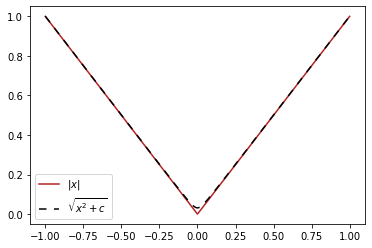

In [23]:
plt.plot(x, np.abs(x))
plt.plot(x, abs_app(x), linestyle=(0, (5,5)), color="black")
plt.legend([r"$|x|$", r"$\sqrt{x^2 + c}$"])
plt.show()

In [24]:
#loss_fit = lambda w, z, y : np.mean(abs_app(np.dot(z, w)-theta) + abs_app(np.dot(z, w)+(-1)**y * b) - np.abs(theta+(-1)**y*b))
#grad_loss_fit = lambda w, z, y : 1/n * np.dot((np.dot(z,w) - theta)/abs_app(np.dot(z,w) - theta)+(-1)**y, z)

loss_fit = lambda w, z, y : np.mean(np.abs(np.dot(z, w)-theta) + np.abs(np.dot(z, w)+(-1)**y * b) - np.abs(theta+(-1)**y*b))
grad_loss_fit = lambda w, z, y : 1/n * np.dot(np.sign(np.dot(z,w) - theta)+(-1)**y, z)
eta = 1.

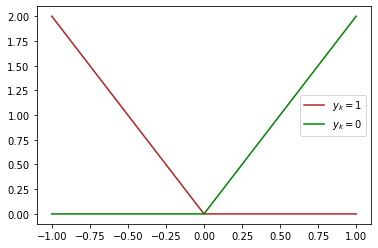

In [25]:
a, b = (theta, 1e6)
plt.plot(x, np.abs(x - a) + np.abs(x+ (-1)**1 * b) - np.abs(a+(-1)**1*b))
plt.plot(x, np.abs(x - a) + np.abs(x+ (-1)**0 * b) - np.abs(a+(-1)**0*b))
plt.legend([r"$y_k = 1$", r"$y_k = 0$"])
plt.show()

In [26]:
free_indices = [k for k in range(n) if np.sum(np.roll(seq, -k)[...,-Nr:]) < 1]
n_ = len(free_indices)
z = np.random.uniform(0, 1, (n_, m))
y = seq[free_indices]

In [27]:
w = np.random.uniform(-1, 1, (m))
for _ in range(1000):
    w -= eta * grad_loss_fit(w, z, y)

In [28]:
y_hat = np.inner(w, z) > theta
seq_hat = np.zeros(n, dtype=int)
seq_hat[free_indices] = y_hat

In [29]:
hamming_dist(seq_hat, seq)

0

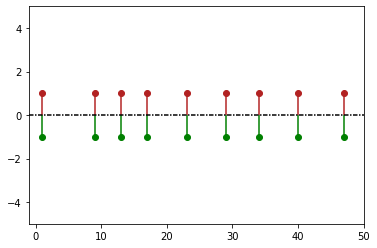

In [30]:
firing_pos = np.argwhere(seq > 0)
hat_firing_pos = np.argwhere(seq_hat > 0)
plt.stem(hat_firing_pos, seq_hat[hat_firing_pos], basefmt=" ")
plt.stem(firing_pos, - seq[firing_pos], linefmt="C1-", markerfmt="C1o", basefmt=" ")
plt.axhline(0, linestyle=(0, (3, 1, 1, 1)), color="black")
plt.ylim(-5, 5)
plt.xlim(-1, n)
plt.show()

For robustness consideration, we are interested in the distribution of the weights

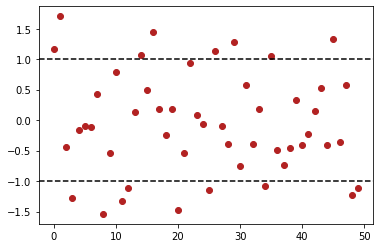

In [31]:
plt.scatter(np.arange(m), w)
plt.axhline(-1, linestyle="dashed", color="black")
plt.axhline(1, linestyle="dashed", color="black")
plt.show()

# Box constraint on the weights

An extended version of the half box optimization to bound weights can be used. We define a (stricly convex) regularization function to enforce the weights being in a specific range $[a, b]$:
\begin{equation}
L_r(w) = \sum_{i=1}^m |w_i - a| + |w_i - b| - |b-a|.
\end{equation}

The partial derivative of the regularization loss function w.r.t each weight is given by:
\begin{equation}
\frac{\partial}{\partial w_i} L_r(w) = \text{sgn}(w_i-a) + \text{sgn}(w_i-b)
\end{equation}

In [36]:
loss_reg = lambda w : np.sum(np.abs(w-a) + np.abs(w-b) - np.abs(b-a))
grad_loss_reg = lambda w : np.sign(w - a) + np.sign(w - b)

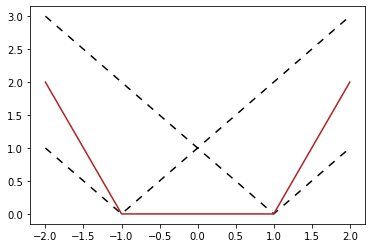

In [37]:
a, b = (-1, 1)
x = np.linspace(-2, 2, 1000)
plt.plot(x, np.abs(x - a), x, np.abs(x-b), linestyle=(0, (5,5)), c="black")
plt.plot(x, np.abs(x - a) + np.abs(x-b) - 2)
plt.show()

Combining the fitting and the reguralization loss functions, we can optimize the weights such that they fit well the sequence to learn and are bounded. The mixing loss function is 
\begin{equation}
L (w) = L_f(w) + \alpha L_r(w)
\end{equation}
where $\alpha \leq 0$ is a balancing parameter. As a sum of convex function, this is also a convex function and it can be optimize via gradient descent.
The gradient of the mixing loss function is given by 
\begin{equation}
\nabla_w L (w) = \nabla_w L_f(w) + \alpha \cdot \nabla_w L_r(w)
\end{equation}
The gradient descent update rule for the weights is then
\begin{equation}
w \leftarrow w + \eta \cdot \nabla_w L(w),
\end{equation}
with $\eta > 0$ the learning rate.

In [38]:
# Total Loss = Fitting Loss + Bound Loss
alpha = 0.5
loss = lambda w, z, y : loss_fit(w, z, y) + alpha * loss_reg(w)
grad_loss = lambda w, z, y : grad_loss_fit(w, z, y) + alpha * grad_loss_reg(w)

In [45]:
w = np.random.uniform(-1, 1, (m))
for _ in range(1000):
    w -= eta * grad_loss(w, z, y)

In [46]:
y_hat = np.inner(w, z) > theta
seq_hat = np.zeros(n, dtype=int)
seq_hat[free_indices] = y_hat

In [47]:
hamming_dist(seq_hat, seq)

0

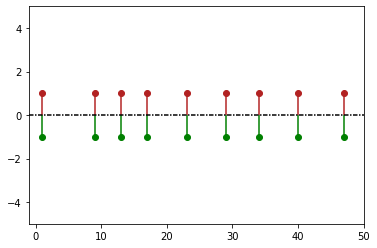

In [48]:
firing_pos = np.argwhere(seq > 0)
hat_firing_pos = np.argwhere(seq_hat > 0)
plt.stem(hat_firing_pos, seq_hat[hat_firing_pos], basefmt=" ")
plt.stem(firing_pos, - seq[firing_pos], linefmt="C1-", markerfmt="C1o", basefmt=" ")
plt.axhline(0, linestyle=(0, (3, 1, 1, 1)), color="black")
plt.ylim(-5, 5)
plt.xlim(-1, n)
plt.show()

We verify the weights are bounded as imposed by our regularization loss function.

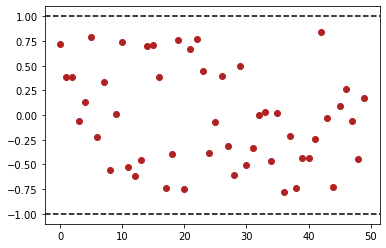

In [49]:
plt.scatter(np.arange(m), w)
plt.axhline(-1, linestyle="dashed", color="black")
plt.axhline(1, linestyle="dashed", color="black")
plt.show()